In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data 

In [86]:
data=pd.read_csv("C:/Users/HP/Downloads/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [87]:
# Checking the rows and columns in the dataframe
data.shape

(1000, 8)

In [89]:
#Checking th individual Columns
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [90]:
"""
Checking for the datatypes and see if all
are in the correct datatype i.e numeric values with 
either int or float dtype
"""
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [91]:
"""
Checking for missing values and see what I can do with them
either fill or drop them
"""
data.isnull().sum()
# We do not have null values in our df data

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [92]:
"""
Renaming the files to look appealing and uniform
Remember when to use inplace=True is only when you do not assign as
data=dat.rename(...
else use inplace=True
Remember to make a copy when assigning
"""
data=data.rename(columns={"gender":"Gender","race/ethnicity":"Race/Ethnicity",
                      "parental level of education":"Parents_EducationLevel",
                     "lunch":"Lunch_Program","test preparation course":"Test_PreparationCourse",
                    "math score":"Math_Score","reading score":"Reading_Score","writing score":"Writing_Score"}).copy()
data.head()

,Gender,Race/Ethnicity,Parents_EducationLevel,Lunch_Program,Test_PreparationCourse,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [93]:
# checking on any duplicates in the dataframe
data.loc[data.duplicated()]

,Gender,Race/Ethnicity,Parents_EducationLevel,Lunch_Program,Test_PreparationCourse,Math_Score,Reading_Score,Writing_Score


In [95]:
"""
This is unnecessary here because we have many students from each gender
there is a possibility of duplication for each subset
""" 
y=data.loc[data.duplicated(subset=["Gender"])]
y.head()

,Gender,Race/Ethnicity,Parents_EducationLevel,Lunch_Program,Test_PreparationCourse,Math_Score,Reading_Score,Writing_Score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [96]:
data.head()
# Our data is now some how clean and presentable 
# to enable us draw some insights 

,Gender,Race/Ethnicity,Parents_EducationLevel,Lunch_Program,Test_PreparationCourse,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Analysis and Visualization

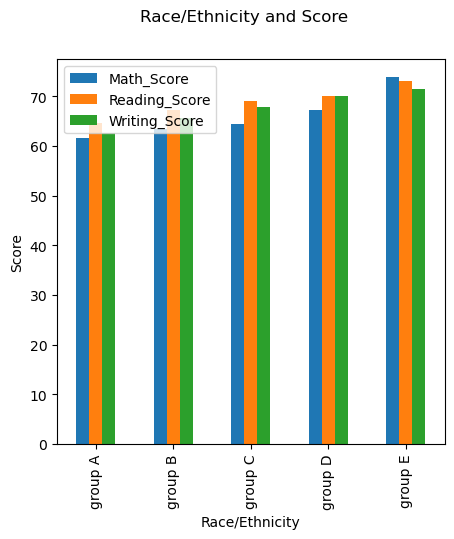

In [97]:
"""
Creating a bar graph showing how students from various races
averagely perform in the three test
"""
data.groupby("Race/Ethnicity")[["Math_Score","Reading_Score","Writing_Score"]].mean().plot(kind="bar",figsize=[5,5])
plt.xlabel("Race/Ethnicity")
plt.ylabel("Score")
plt.suptitle("Race/Ethnicity and Score")
plt.show()

# You can see students from ethnicity E performed averagely well in all subjects 

In [98]:
#checking the average score by gender
data.groupby("Gender")[["Math_Score","Reading_Score","Writing_Score"]].mean()

,Math_Score,Reading_Score,Writing_Score
Gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [113]:
# Finding the average scores for the three subjects
data[["Math_Score","Reading_Score","Writing_Score"]].mean()

Math_Score       66.089
Reading_Score    69.169
Writing_Score    68.054
dtype: float64

In [114]:
#You can as well use this inbuilt pandas function
data.describe()

,Math_Score,Reading_Score,Writing_Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [101]:
# Showing how females prepare for the exams
y=data[data["Gender"]=="female"]["Test_PreparationCourse"].agg(pd.Series.mode)
print(y)
#Most female students did not complete preparations for the exams

0    none
Name: Test_PreparationCourse, dtype: object


In [102]:
#checking the average score by parental Education level
data.groupby("Parents_EducationLevel")[["Math_Score","Reading_Score","Writing_Score"]].mean()
#students whose parents have masters degree performed well in all subjects
#With exemplarly performance in reading and writing

,Math_Score,Reading_Score,Writing_Score
Parents_EducationLevel,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [103]:
data.groupby("Test_PreparationCourse")[["Math_Score","Reading_Score","Writing_Score"]].mean()
#Students who completed the preparation performed well in all the subjects

,Math_Score,Reading_Score,Writing_Score
Test_PreparationCourse,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [104]:
data.groupby("Lunch_Program")[["Math_Score","Reading_Score","Writing_Score"]].mean()
#Students with a standard lunch program performed well in all the subjects

,Math_Score,Reading_Score,Writing_Score
Lunch_Program,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


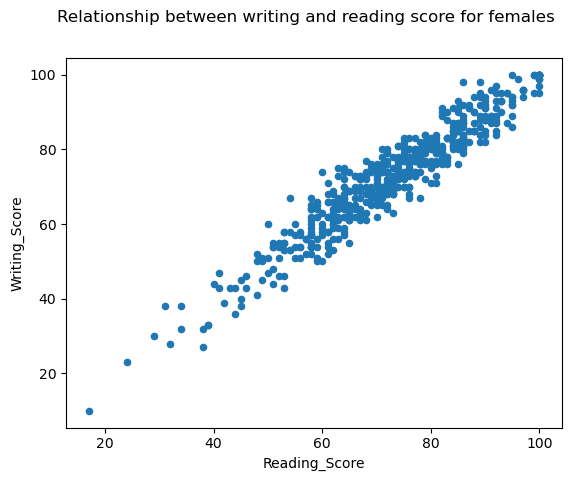

In [115]:
data[data["Gender"]=='female'][["Reading_Score","Writing_Score"]].plot(kind="scatter",
                     x="Reading_Score",y="Writing_Score",stacked=False)
plt.suptitle("Relationship between writing and reading score for females")
plt.savefig("png")
plt.show()
# This shows a high postive correlation between writing and reading scores for female students 

<AxesSubplot:xlabel='Math_Score', ylabel='Writing_Score'>

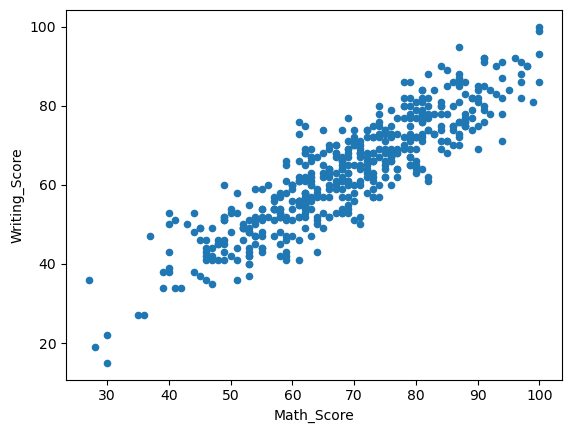

In [111]:
data[data["Gender"]=='male'][["Math_Score","Writing_Score"]].plot(kind="scatter",
                     x="Math_Score",y="Writing_Score",stacked=False)
# This shows a high postive correlation between writing and Math scores for Male students 